Wir laden zuerst `taupy` und speichern die Argumentations-Strategien extra im Namespace unter `strategies` ab, um sie gleich leichter zu erreichen.

Wenn taupy von GitHub geklont ist, kann es einfach mit `pip install taupy/` installiert werden.

In [1]:
from taupy import * 
import taupy.simulation.strategies as strategies

Jetzt definieren wir jeweils zwei Positionen pro Strategie. `Position` ist eine Klasse, die normalerweise immer mit einer `Debate`-Instanz verknüpft ist. In den Simulationen hier beginnen wir mit einer leeren Debatte und wählen also `debate=None`.

Eine `Position` wird mit weiteren Parametern initiiert, die hier nicht gezeigt werden. An eine Position kann ein `dict` übergeben werden, was die jeweiligen Satzvariablen einem Wahrheitswert zuweist, zB `Position(debate=None, {p1: True, p2: False})`. Außerdem könnten wir noch eine `update_strategy` wählen. Diese ist per Default `closest_coherent` -- ansonsten verfügt `taupy` bis jetzt nur über `update_random`. 

In [2]:
pos1ra = Position(debate=None, introduction_strategy=strategies.random)
pos2ra = Position(debate=None, introduction_strategy=strategies.random)

pos1fo = Position(debate=None, introduction_strategy=strategies.fortify)
pos2fo = Position(debate=None, introduction_strategy=strategies.fortify)

pos1at = Position(debate=None, introduction_strategy=strategies.attack)
pos2at = Position(debate=None, introduction_strategy=strategies.attack)

pos1co = Position(debate=None, introduction_strategy=strategies.convert)
pos2co = Position(debate=None, introduction_strategy=strategies.convert)

pos1un = Position(debate=None, introduction_strategy=strategies.undercut)
pos2un = Position(debate=None, introduction_strategy=strategies.undercut)

... und die dazugehörigen Simulationen. Auch hier lassen wir einige Parameter des `Simulation`-Objekts außer acht. Beispielsweise könnten wir den Satzpool anpassen. Standardmäßig ist der Satzpool mit `p:10` angegeben, was eine `sympy`-Kurzform von `[p0, p1, ..., p9]` ist. Die Negationen werden automatisch von der `init`-Funktion von `Simulation` hinzugefügt, sodass in diesen Simulationen 20 Sätze zur Verfügung stehen. Wir könnten außerdem die Größe der zufällig gezogenen Argumente anpassen. Standardmäßig ist `argumentlength=2` eingestellt. Wir könnten eine andere Zahl oder eine Liste übergeben. Bei `argumentlength=[2,3]` würden Argumente mit entweder 2 oder 3 Prämissen gezogen werden. Das Argument `positions=[]` übergibt die Positionen, die an einer Simulation teilnehmen. Für alle Argumentstrategien außer `strategies.fortify` und `strategies.random` müssen mindestens zwei Positionen übergeben werden. `random`-Simuationen funktionieren auch ganz ohne Positionen, für `fortify` brauchen wir nur eine.

In [3]:
simra = Simulation(positions = [pos1ra, pos2ra])
simfo = Simulation(positions = [pos1fo, pos2fo])
simat = Simulation(positions = [pos1at, pos2at])
simco = Simulation(positions = [pos1co, pos2co])
simun = Simulation(positions = [pos1un, pos2un])

## Simulationen ausführen

In [4]:
simra.run()

Simulation ended. 36 steps were taken. Density at end: 1.000000. Extension of SCCP: 1.


In [5]:
simfo.run()

Simulation ended. 70 steps were taken. Density at end: 1.000000. Extension of SCCP: 1.


In [6]:
simat.run()

Simulation ended. 79 steps were taken. Density at end: 0.767807. Extension of SCCP: 5.


In [7]:
simco.run()

Simulation ended. 46 steps were taken. Density at end: 1.000000. Extension of SCCP: 1.


In [8]:
simun.run()

Simulation ended. 30 steps were taken. Density at end: 1.000000. Extension of SCCP: 1.


## Ergebnisse plotten
Wir wollen jetzt noch den Verlauf des *normalised agreement* in diesen Debatten messen. Auf der x-Achse ist der Schritt angegeben, die y-Achse zeigt das *normalised agreement*.

In [9]:
import matplotlib.pyplot as plt

### Plot für Random

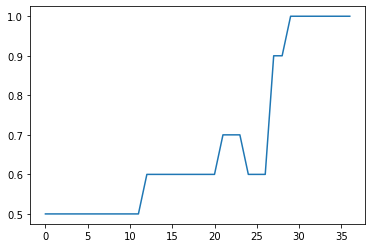

In [10]:
simra_agr = [bna(simra.positions[i][0], simra.positions[i][1]) for i in range(len(simra.positions))]
plt.plot(simra_agr)

### Plot für Fortify

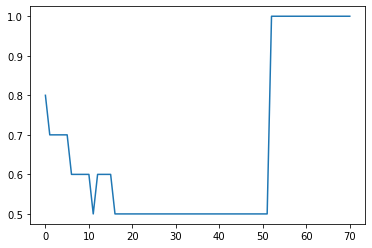

In [11]:
simfo_agr = [bna(simfo.positions[i][0], simfo.positions[i][1]) for i in range(len(simfo.positions))]
plt.plot(simfo_agr)

### Plot für Attack

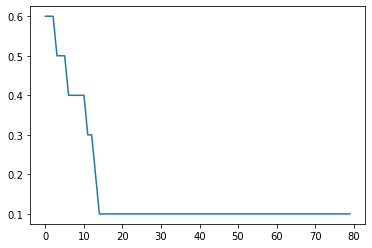

In [12]:
simat_agr = [bna(simat.positions[i][0], simat.positions[i][1]) for i in range(len(simat.positions))]
plt.plot(simat_agr)

### Plot für Convert

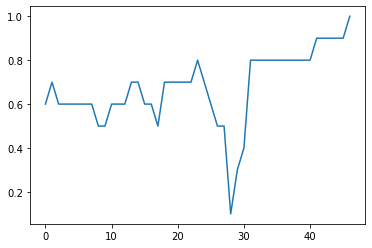

In [13]:
simco_agr = [bna(simco.positions[i][0], simco.positions[i][1]) for i in range(len(simco.positions))]
plt.plot(simco_agr)

### Plot für Undercut

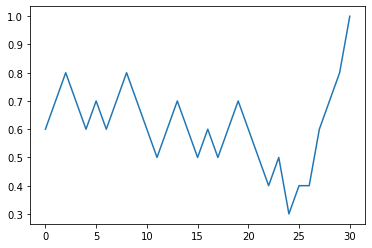

In [14]:
simun_agr = [bna(simun.positions[i][0], simun.positions[i][1]) for i in range(len(simun.positions))]
plt.plot(simun_agr)